<a href="https://colab.research.google.com/github/alisterpage/CHEM3580-Jupyter-Notebooks/blob/main/H2_phasespace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipympl -q 2>&1 >/dev/null

interactive(children=(FloatSlider(value=0.751, description='r', max=1.251, min=0.251, step=0.01), Output()), _…

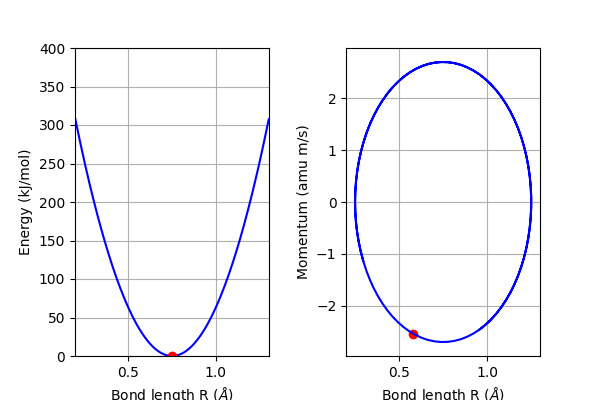

In [2]:
#@title

%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from google.colab import output
output.enable_custom_widget_manager()

# set up plot
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(6, 4), gridspec_kw={'wspace': 0.4})
ax[0].set_ylim([0, 400])
ax[0].set_xlim([0.2,1.3])
ax[0].set_ylabel("Energy (kJ/mol)")
ax[0].set_xlabel("Bond length R ($\AA$)")
ax[0].grid(True)
ax[1].set_xlabel("Bond length R ($\AA$)")
ax[1].set_ylabel("Momentum (amu m/s)")
#ax[1].set_xlim([0.251,1.251])
#ax[1].set_ylim([-20.0,+20.0])
ax[1].grid(True)
 
#declare globals
xarray = np.linspace(0.2, 1.3, 150)
xmin=0.751
k = 1020.0
A = 0.5
w = 10.0
m = 1.08*1.08/(1.08+1.08)

def harmonic_curve(k, xarray, xmin):
    return k*(xarray-xmin)**2

def harmonic_energy(k, r, xmin):
    return k*(r-xmin)**2    

def harmonic_position(A,w,r):
    return A*np.cos(w*r)

def harmonic_momentum(A,w,r,m):
    return -m*A*w*np.sin(w*r)

@widgets.interact(r=(0.251, 1.251, 0.01),continuous_update=False)
def update(r = 0.751):
    """Remove old lines from plot and plot new one"""
    [l.remove() for l in ax[0].lines]
    fig_size = fig.get_size_inches()*fig.dpi   
    ax[0].plot(xarray, harmonic_curve(k,xarray,xmin),color='blue')
    ax[0].plot(r,harmonic_energy(k,r,xmin),marker="o",color='red')
    ax[1].plot(xmin-harmonic_position(A,w,r),harmonic_momentum(A,w,r,m),marker="o",color='red')
    ax[1].plot(xmin-harmonic_position(A,w,xarray),harmonic_momentum(A,w,xarray,m),color='blue')
   




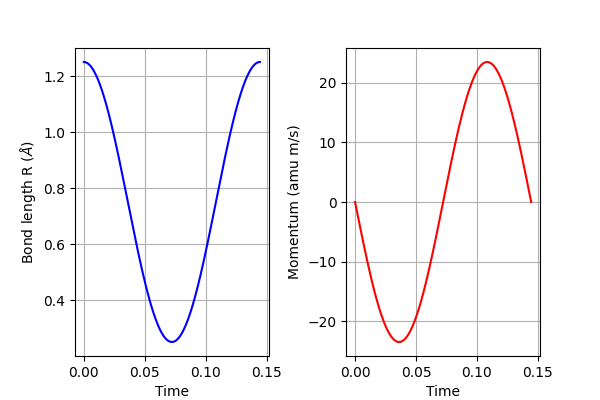

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from google.colab import output
output.enable_custom_widget_manager()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#declare globals
xmin=0.751
k = 1020.0
A = 0.5
m = 1.08*1.08/(1.08+1.08)
w = np.sqrt(k/m)
x0=xmin
tstart=0.0
tend=2*np.pi/w
tarray = np.linspace(tstart,tend, 2000)

def harmonic_curve(k, xarray, xmin):
    return k*(xarray-xmin)**2

def harmonic_energy(k, r, xmin):
    return k*(r-xmin)**2    

def harmonic_position(w,t,A):
    return A*np.cos(w*t)

def harmonic_momentum(w,t,m):
    return -m*w*np.sin(w*t)

# set up plot
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(6, 4), gridspec_kw={'wspace': 0.4})
#ax[0].set_ylim([0, 400])
#ax[0].set_xlim([0.2,1.3])
ax[1].set_ylabel("Momentum (amu m/s)")
ax[0].set_xlabel("Time")
ax[0].grid(True)
ax[1].set_xlabel("Time")
ax[0].set_ylabel("Bond length R ($\AA$)")
#ax[1].set_xlim([0.251,1.251])
#ax[1].set_ylim([-20.0,+20.0])
ax[1].grid(True)
ax[0].plot(tarray, xmin+harmonic_position(w,tarray,A),color='blue')
ax[1].plot(tarray,harmonic_momentum(w,tarray,m),color='red')




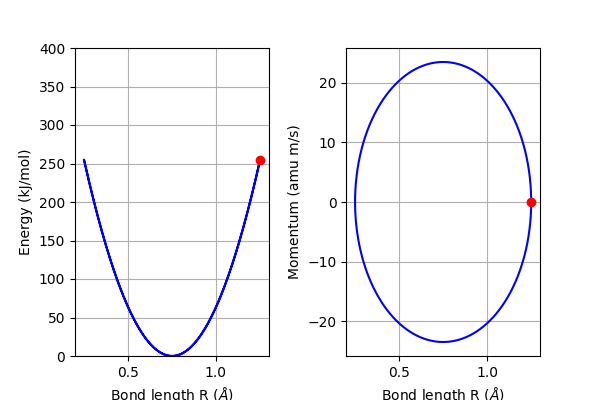

In [2]:
# create the play widget
play = widgets.Play(
    value=0.751,
    min=0.5,
    max=1.0,
    step=0.01,
    interval=100,
    description="Bond length R ($\AA$)",
    disabled=False,
)

# create the slider widget
slider = widgets.FloatSlider(
    value=0.751,
    min=0.5,
    max=1.0,
    step=0.01,
    description="Bond length R ($\AA$)",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format=".2f",
)

# create plot
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(6, 4), gridspec_kw={'wspace': 0.4})
tarray = np.linspace(tstart,tend, 2000)
ax[0].set_ylim([0, 400])
ax[0].set_xlim([0.2,1.3])
ax[0].set_ylabel("Energy (kJ/mol)")
ax[0].set_xlabel("Bond length R ($\AA$)")
ax[0].grid(True)
ax[1].set_xlabel("Bond length R ($\AA$)")
ax[1].set_ylabel("Momentum (amu m/s)")
ax[1].grid(True)
curve_line0, = ax[0].plot(xmin+harmonic_position(w,tarray,A), harmonic_curve(k,xmin+harmonic_position(w,tarray,A),xmin),color='blue')
curve_line1, = ax[1].plot(xmin+harmonic_position(w,tarray,A),harmonic_momentum(w,tarray,m),color='blue')
marker_line0, = ax[0].plot(xmin+harmonic_position(w,play.value,A), harmonic_energy(k, xmin+harmonic_position(w,play.value,A), xmin), marker="o", color='red')
marker_line1, = ax[1].plot(xmin+harmonic_position(w,play.value,A), harmonic_momentum(w, play.value, m), marker="o", color='red')

# function to update the marker position
def update_marker(r):
    marker_line0.set_xdata(xmin+harmonic_position(w,r,A))
    marker_line0.set_ydata(harmonic_energy(k,xmin+harmonic_position(w,r,A),xmin))
    marker_line1.set_xdata(xmin+harmonic_position(w,r,A))
    marker_line1.set_ydata(harmonic_momentum(w, r, m))

# function to update the plot
def update_plot(r):
    curve_line0, = ax[0].plot(xmin+harmonic_position(w,tarray,A), harmonic_curve(k,xmin+harmonic_position(w,tarray,A),xmin),color='blue')
    curve_line1, = ax[1].plot(xmin+harmonic_position(w,tarray,A),harmonic_momentum(w,tarray,m),color='blue')
    update_marker(r)

In [3]:
# create the animation using FuncAnimation
ani = FuncAnimation(fig, update_plot, frames=np.arange(0.5, 1.0, 0.01), interval=15, repeat=True)

# display the widgets and animation
widgets.VBox([slider, play])
HTML(ani.to_jshtml())
